In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_mov = pd.read_fwf('zee-movies.dat',encoding='ISO-8859-1')

In [3]:
df_mov.head()

,Movie ID::Title::Genres,Unnamed: 1,Unnamed: 2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN
2,3::Grumpier Old Men (1995)::Comedy|Romance,NaN,NaN
3,4::Waiting to Exhale (1995)::Comedy|Drama,NaN,NaN
4,5::Father of the Bride Part II (1995)::Comedy,NaN,NaN


In [4]:
df_mov = pd.read_csv('zee-movies.dat', sep='::', encoding='ISO-8859-1')
df_mov.rename(columns={'Movie ID': 'MovieID'}, inplace=True)

df_mov.head()

C:\Users\SAKUMARDASH\AppData\Local\Temp\ipykernel_3876\2978605720.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_mov = pd.read_csv('zee-movies.dat', sep='::', encoding='ISO-8859-1')


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df_user = pd.read_csv('zee-users.dat',sep='::',encoding='ISO-8859-1')
df_user.head()

C:\Users\SAKUMARDASH\AppData\Local\Temp\ipykernel_3876\371683850.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_user = pd.read_csv('zee-users.dat',sep='::',encoding='ISO-8859-1')


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
df_rat = pd.read_csv('zee-ratings.dat',sep='::',encoding='ISO-8859-1')
df_rat.head()

C:\Users\SAKUMARDASH\AppData\Local\Temp\ipykernel_3876\820338604.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_rat = pd.read_csv('zee-ratings.dat',sep='::',encoding='ISO-8859-1')


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
df_result = pd.merge(df_user,df_rat,on='UserID', how='inner')

In [8]:
df = pd.merge(df_mov,df_result,on='MovieID', how='inner')

In [9]:
df.head()

,MovieID,Title,Genres,UserID,Gender,Age,Occupation,Zip-code,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,F,1,10,48067,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,F,50,9,55117,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,M,25,12,11413,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,M,25,17,61614,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,F,35,1,95370,5,978226474


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  int64 
 1   Title       1000209 non-null  object
 2   Genres      1000209 non-null  object
 3   UserID      1000209 non-null  int64 
 4   Gender      1000209 non-null  object
 5   Age         1000209 non-null  int64 
 6   Occupation  1000209 non-null  int64 
 7   Zip-code    1000209 non-null  object
 8   Rating      1000209 non-null  int64 
 9   Timestamp   1000209 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [11]:
#So there are no nulls we are good to go 
df.isnull().sum()

MovieID       0
Title         0
Genres        0
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
Rating        0
Timestamp     0
dtype: int64

In [12]:
#Checking the distribution of the dataset
df.describe()

,MovieID,UserID,Age,Occupation,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.024512e+03,2.973831e+01,8.036138e+00,3.581564e+00,9.722437e+08
std,1.096041e+03,1.728413e+03,1.175198e+01,6.531336e+00,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,9.567039e+08
25%,1.030000e+03,1.506000e+03,2.500000e+01,2.000000e+00,3.000000e+00,9.653026e+08
50%,1.835000e+03,3.070000e+03,2.500000e+01,7.000000e+00,4.000000e+00,9.730180e+08
75%,2.770000e+03,4.476000e+03,3.500000e+01,1.400000e+01,4.000000e+00,9.752209e+08
max,3.952000e+03,6.040000e+03,5.600000e+01,2.000000e+01,5.000000e+00,1.046455e+09


In [13]:
#Shape of Dataset
print("No of rows/records",df.shape[0])
print("No of columns/Features",df.shape[1])

No of rows/records 1000209
No of columns/Features 10


In [14]:
#Check for duplicated rows as we can see there are none 
print(df.duplicated().sum())

0


<AxesSubplot:xlabel='Rating', ylabel='count'>

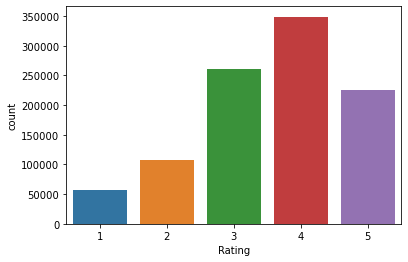

In [15]:
#As we can see from the graph below most of the movies are rated 3 or above 
sns.countplot(x='Rating',data=df)

In [16]:
# Derive new feature 'Release Year' from 'Title'

df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df['Release Year'] = df['Title'].str.extract(r'\((\d{4})\)')
df['Release Year'] = pd.to_numeric(df['Release Year'], errors='coerce')


In [17]:
df['Release Year'].isnull().sum()

0

In [18]:
#Check the avg rating for each MovieID and the total no of ratings it recieved
movie_stats = df.groupby('MovieID')['Rating'].agg(['mean', 'count']).reset_index()
movie_stats.columns = ['MovieID', 'Average Rating', 'Number of Ratings']
movie_stats.head(10)

,MovieID,Average Rating,Number of Ratings
0,1,4.146846,2077
1,2,3.201141,701
2,3,3.016736,478
3,4,2.729412,170
4,5,3.006757,296
5,6,3.878723,940
6,7,3.410480,458
7,8,3.014706,68
8,9,2.656863,102
9,10,3.540541,888


# CREATING RECOMMENDATION USING PEARSON CORELATION

In [19]:
#creating pivot table using movie title and userid
#Imputing 0 considering it as 0 rating given by the user for null as it is not possible for an user to watch all the movies
pivot_table = df.pivot_table(index='UserID',columns='Title',values='Rating')
pivot_table = pivot_table.fillna(0)


In [20]:
pivot_table

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.0,3.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#Calculate Pearson Correlation
movie_correlation = pivot_table.corr(method='pearson')


In [22]:
#Recommendation based on PEARSON CORELATION 
def movie_recom(movie_title,corr_matrix,n=5):
    similar_movies = corr_matrix[movie_title]
    recommendations = similar_movies.sort_values(ascending=False).head(n+1).index[1:]
    return recommendations

In [23]:
#Recommendation for movie TOY STORY
movie_title_input = 'Toy Story (1995)'
recommendations = movie_recom(movie_title_input, movie_correlation)


In [24]:
for i in recommendations:
    print(i)

Toy Story 2 (1999)
Aladdin (1992)
Lion King, The (1994)
Groundhog Day (1993)
Bug's Life, A (1998)


These are the recommendation of movies based on the movie TOY STORY

# BUILD A RECOMMENDATION SYSTEM USING COSINE SIMILARITY AND USING NEAREST NEIGHBOUR ALGORITHM

In [25]:
from sklearn.metrics.pairwise import cosine_similarity as cs
from sklearn.neighbors import NearestNeighbors as nn

In [26]:
#We will use the same pivot table we created for PEARSON CORRELATION here also 
#Here we are calculating the cosine similarity of each movie with others
movie_similarity_mat = cs(pivot_table.T) 
print("Item Similarity Matrix :")
print(movie_similarity_mat)
user_similarity_mat = cs(pivot_table) 
print("User Similarity Matrix :")
print(user_similarity_mat)

Item Similarity Matrix :
[[1.         0.07235746 0.03701053 ... 0.         0.12024178 0.02700277]
 [0.07235746 1.         0.11528952 ... 0.         0.         0.07780705]
 [0.03701053 0.11528952 1.         ... 0.         0.04752635 0.0632837 ]
 ...
 [0.         0.         0.         ... 1.         0.         0.04564448]
 [0.12024178 0.         0.04752635 ... 0.         1.         0.04433508]
 [0.02700277 0.07780705 0.0632837  ... 0.04564448 0.04433508 1.        ]]
User Similarity Matrix :
[[1.         0.09638153 0.12060981 ... 0.         0.17460369 0.13359025]
 [0.09638153 1.         0.1514786  ... 0.06611767 0.0664575  0.21827563]
 [0.12060981 0.1514786  1.         ... 0.12023352 0.09467506 0.13314404]
 ...
 [0.         0.06611767 0.12023352 ... 1.         0.16171426 0.09930008]
 [0.17460369 0.0664575  0.09467506 ... 0.16171426 1.         0.22833237]
 [0.13359025 0.21827563 0.13314404 ... 0.09930008 0.22833237 1.        ]]


In [27]:
#Training the model
model = nn(metric='cosine',algorithm='brute',n_neighbors=5)
model.fit(pivot_table.T)

NearestNeighbors(algorithm='brute', metric='cosine')

In [28]:
#Getting recommendation based on the above model using a function
def movie_recomm_nn(user_ratings,nn_model,user_similarity_mat,n=5):
#         cosine_similarities = cs([user_ratings], pivot_table)
        distances, indices = model.kneighbors(user_similarity_mat, n_neighbors=n+1)
        recomm = [pivot_table.columns[i] for i in indices.flatten()][1:]
        return recomm


In [29]:
# Example: Get recommendations for a user's ratings
user_ratings_input = [5, 4, 0, 0, 0]  # User's ratings for each movie
recommendations = movie_recomm_nn(user_ratings_input, model, user_similarity_mat)


In [30]:
# Extract movie titles based on the recommendations
recommended_titles = df[df['MovieID'].isin(recommendations)].drop_duplicates(subset='MovieID')['Title']

# Display the recommended movie titles
print("Top  movie recommendations are :")
for i, title in enumerate(recommended_titles, start=1):
    print(f"{i}. {title}")

Top  movie recommendations are :


# Build a Recommender System based on Matrix Factorization. 




In [37]:
import numpy as np

def matrix_factorization(ratings_matrix, K, learning_rate, reg_param, epochs):
    # Initialize user and item matrices with random values
    num_users, num_items = ratings_matrix.shape
    user_matrix = np.random.rand(num_users, K)
    item_matrix = np.random.rand(num_items, K)

    for epoch in range(epochs):
        for i in range(num_users):
            for j in range(num_items):
                if ratings_matrix[i, j] > 0:
                    # Calculate error and update user and item matrices
                    error_ij = ratings_matrix[i, j] - np.dot(user_matrix[i, :], item_matrix[j, :])
                    user_matrix[i, :] += learning_rate * (2 * error_ij * item_matrix[j, :] - reg_param * user_matrix[i, :])
                    item_matrix[j, :] += learning_rate * (2 * error_ij * user_matrix[i, :] - reg_param * item_matrix[j, :])

    return user_matrix, item_matrix

# Assuming you have loaded your ratings data into a numpy array called 'ratings_matrix'
# Replace 'K', 'learning_rate', 'reg_param', and 'epochs' with suitable values
K = 10
learning_rate = 0.01
reg_param = 0.1
epochs = 20

# Perform matrix factorization
ratings_matrix = df.pivot_table(index='UserID', columns='MovieID', values='Rating', fill_value=0)
user_matrix, item_matrix = matrix_factorization(ratings_matrix.values, K, learning_rate, reg_param, epochs)

# Predictions can be obtained by multiplying the user and item matrices
predicted_ratings = np.dot(user_matrix, item_matrix.T)


In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming actual_ratings is your original ratings_matrix with the real ratings
actual_ratings = ratings_matrix.values

# Flatten both actual and predicted ratings for comparison
actual_ratings_flat = actual_ratings.flatten()
predicted_ratings_flat = predicted_ratings.flatten()

# Filter out the non-zero values (ratings given by users)
non_zero_indices = actual_ratings_flat != 0
actual_ratings_filtered = actual_ratings_flat[non_zero_indices]
predicted_ratings_filtered = predicted_ratings_flat[non_zero_indices]

# Calculate RMSE
rmse = sqrt(mean_squared_error(actual_ratings_filtered, predicted_ratings_filtered))

print("RMSE:", rmse)


RMSE: 0.8273326672588436


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


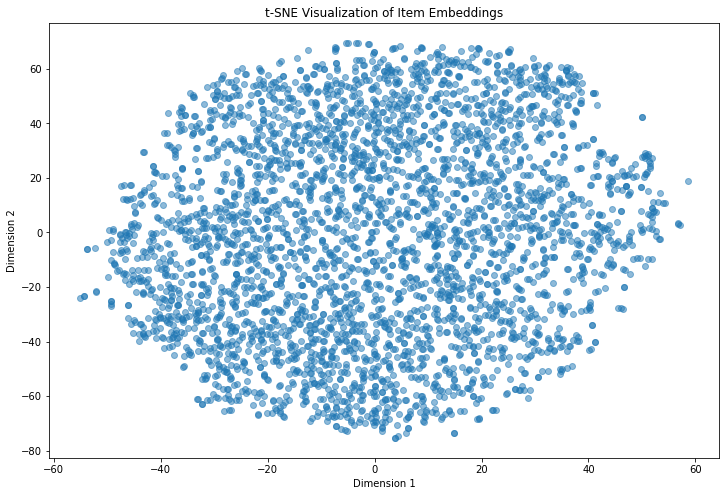

In [41]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


# Perform t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(item_matrix)  # Change to user_matrix if needed

# Plot the embeddings
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.5)
plt.title("t-SNE Visualization of Item Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


In [44]:
!jupyter nbconvert --to pdf --output=custom_output_name.pdf Recommender_System.ipynb


[NbConvertApp] Converting notebook Recommender_System.ipynb to pdf
[NbConvertApp] ERROR | Error while converting 'Recommender_System.ipynb'
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 435, in export_single_notebook
    output, resources = self.exporter.from_filename(notebook_filename, resources=resources)
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\exporters\exporter.py", line 190, in from_filename
    return self.from_file(f, resources=resources, **kw)
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\exporters\exporter.py", line 208, in from_file
    return self.from_notebook_node(nbformat.read(file_stream, as_version=4), resources=resources, **kw)
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\exporters\pdf.py", line 168, in from_notebook_node
    latex, resources = super().from_notebook_node(
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\exporters\late